In [1]:
import os
import sys
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

sys.path.append('..')

from zcor_adrd import dataprocessing
from zcor_adrd import pfsageneration
from zcor_adrd import pfsascoreestimation
from zcor_adrd import zcorstats

In [2]:
!pwd

/mnt/c/Users/onisc/Documents/ZBL/ZCOR-ADRD/notebooks


In [3]:
!ls ..

LICENSE  README.md  bin  data  models  notebooks  zcor_adrd


In [4]:
dataprocessing.ternary_encoding('../data/RAW_SAMPLE.csv')

In [5]:
PFSA_SET = pd.read_csv("../data/PFSA_SET.csv")
LLK_SET = pd.read_csv("../data/LLK_SET.csv")

print(PFSA_SET.target.value_counts())
print(LLK_SET.target.value_counts())

0    9103
1     368
Name: target, dtype: int64
0    9083
1     388
Name: target, dtype: int64


In [6]:
PFSA_SET.sample()

,patient_id,gender,age_at_screening,sequence,sequence_weeks,sequence_codes,abs_sequence_weeks,prediction_point,first_week,last_week,...,DX_Rheumatism_codes,DX_Sleep_Disorders_codes,DX_Symptoms_Abs_Pelvis_codes,DX_Symptoms_Digestive_codes,DX_Symptoms_General_codes,DX_Symptoms_Respiratory_codes,DX_Symptoms_Skin_codes,DX_Symptoms_Urinary_codes,DX_Thyroid_codes,target
2793,P12790,M,68.826923,0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 ...,5 6 6 18 31 37 56 74 85 93 93 102 102 102 103 ...,556.9 729.5 719.43 403.10 556.9 401.1 401.1 40...,360 361 361 373 386 392 411 429 440 448 448 45...,459,360,458,...,729.5,None,None,None,None,None,None,None,None,0


In [7]:
LLK_SET.sample()

,patient_id,gender,age_at_screening,sequence,sequence_weeks,sequence_codes,abs_sequence_weeks,prediction_point,first_week,last_week,...,DX_Rheumatism_codes,DX_Sleep_Disorders_codes,DX_Symptoms_Abs_Pelvis_codes,DX_Symptoms_Digestive_codes,DX_Symptoms_General_codes,DX_Symptoms_Respiratory_codes,DX_Symptoms_Skin_codes,DX_Symptoms_Urinary_codes,DX_Thyroid_codes,target
2432,P8825,M,89.846154,0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 ...,15 15 15 47 47 52 52 66 66 66 66 77 77 78 78 7...,V54.81 V43.65 V43.64 786.05 780.79 585.3 786.0...,59 59 59 91 91 96 96 110 110 110 110 121 121 1...,148,59,129,...,729.81 729.81 729.81 729.81,None,None,None,780.79,786.05 786.05 786.2 786.2,None,None,None,0


In [8]:
pfsageneration.generate_pfsa(PFSA_SET)

In [9]:
pfsascoreestimation.generate_pfsa_features(
    LLK_SET,
    save_path = '../data/pfsa_features.csv')

In [10]:
zcorstats.compute_performance(
                '../data/pfsa_features.csv',
                'MEAN_DX_sld',
            )

In [11]:
pd.read_csv("../data/performance/performance_stats.csv")

,fpr,auc,confidence,cb,p,tpr,ppv,npv,pos_LR,neg_LR,f1,accuracy
0,0.01,0.649808,0.038613,0.99,1.381324e-23,0.005155,0.021739,0.958787,0.515464,1.004894,0.008333,0.949672
1,0.05,0.649808,0.038613,0.99,1.381324e-23,0.007732,0.006369,0.957160,0.154639,1.044493,0.006985,0.909812
2,0.10,0.649808,0.038613,0.99,1.381324e-23,0.010309,0.004396,0.955077,0.103093,1.099656,0.006163,0.863608
3,0.15,0.649808,0.038613,0.99,1.381324e-23,0.041237,0.011577,0.953938,0.274914,1.127956,0.018079,0.816240
4,0.20,0.649808,0.038613,0.99,1.381324e-23,0.082474,0.017085,0.953065,0.412371,1.146907,0.028306,0.767710
5,0.25,0.649808,0.038613,0.99,1.381324e-23,0.105670,0.017220,0.950968,0.422680,1.192440,0.029614,0.715902


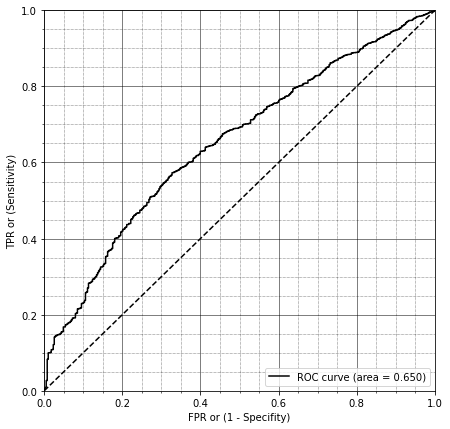

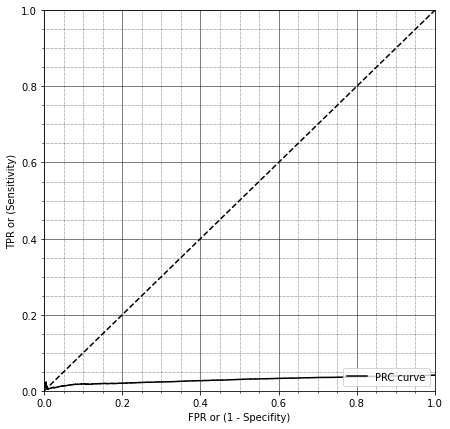

In [12]:
zcorstats.plot_curves(
    pd.read_csv("../data/performance/performance_stats.csv"),
    pd.read_csv("../data/performance/ROC.csv"),
    pd.read_csv("../data/performance/PRC.csv")
)